In [1]:
# !pip install dabest --user


In [1]:
import numpy as np
import pandas as pd
import dabest
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kab285/Downloads/metaloki/analysis/aggregated_data/RT_var_df.csv')
df = df.groupby(['sub', 'phase']).rt.mean().reset_index()

In [3]:
rot_un_df = df.loc[df.phase != 'b'].copy().reset_index(drop=1)

In [4]:
rot_un_df.head()

,sub,phase,rt
0,912,r,0.107228
1,912,u,0.103555
2,913,r,0.115723
3,913,u,0.261915
4,914,r,0.162312


In [5]:
print(rot_un_df['sub'].nunique(),  'Subjects')

20 Subjects


In [6]:
rot_un_df_wide = rot_un_df.pivot(index='sub',columns='phase',values='rt').reset_index()

rot_un_df_wide.rename(columns={'r': 'Rotation', 'u': 'Inversion'}, inplace=1)

In [7]:
rot_un_df_wide.head()

phase,sub,Rotation,Inversion
0,912,0.107228,0.103555
1,913,0.115723,0.261915
2,914,0.162312,0.149486
3,915,0.171245,0.142367
4,916,0.133187,0.107756


In [9]:
two_groups_paired = dabest.load(rot_un_df_wide, idx=("Rotation", "Inversion"),
                                paired='baseline', id_col="sub")

In [10]:
two_groups_paired.mean_diff

DABEST v2023.02.14
                  
Good afternoon!
The current time is Mon Sep 11 15:54:58 2023.

The paired mean difference for repeated measures against baseline 
between Rotation and Inversion is 0.0228 [95%CI -0.002, 0.0711].
The p-value of the two-sided permutation t-test is 0.238, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

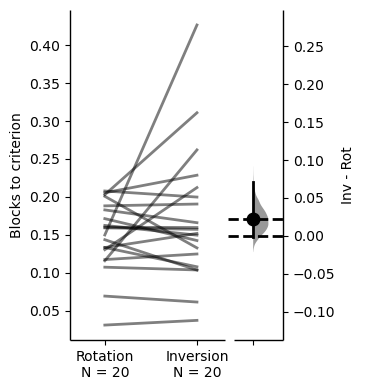

In [11]:
ax = two_groups_paired.mean_diff.plot(swarm_label='Blocks to criterion',slopegraph_kwargs={'color': 'red', 'lw': 2},
                                      reflines_kwargs={'linestyle':'dashed', 'linewidth': 2},contrast_label=r'Inv - Rot')

ax.gca().set(xticklabels=[])

ax.savefig('/Users/kab285/Downloads/metaloki/analysis/figures/effectsize_Rot_Inv.pdf', dpi=300)

# Excluding the nonlearner

In [12]:
non_learner = 927
excluding_nonlearner = (rot_un_df_wide.loc[rot_un_df_wide['sub'] != non_learner].copy()).reset_index(drop=True)

In [13]:
learners_two_groups_paired = dabest.load(excluding_nonlearner, idx=("Rotation", "Inversion"),
                                paired='baseline', id_col="sub")

In [14]:
learners_two_groups_paired.mean_diff

DABEST v2023.02.14
                  
Good afternoon!
The current time is Mon Sep 11 15:55:29 2023.

The paired mean difference for repeated measures against baseline 
between Rotation and Inversion is 0.0245 [95%CI -0.00148, 0.0745].
The p-value of the two-sided permutation t-test is 0.21, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

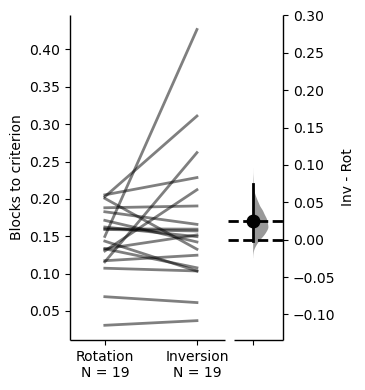

In [15]:
ax = learners_two_groups_paired.mean_diff.plot(swarm_label='Blocks to criterion',slopegraph_kwargs={'color': 'red', 'lw': 2},
                                      reflines_kwargs={'linestyle':'dashed', 'linewidth': 2},contrast_label=r'Inv - Rot')

ax.gca().set(xticklabels=[])

ax.savefig('/Users/kab285/Downloads/metaloki/analysis/figures/effectsize_Rot_Inv_exclude.pdf', dpi=300)